## Phase 1: Domain-Specific Knowledge Graph Construction (Inspired by PHALM)

This section describes our approach to constructing a domain-specific knowledge graph, taking methodological inspiration from the PHALM research paper:
PHALM: A Graph Prompting Framework for Reasoning with Language Models
*https://arxiv.org/abs/2310.07170*


### Summary of PHALM:
**PHALM** presents a framework for commonsense reasoning by combining:

- *Crowdsourcing* to construct a small, high-quality seed knowledge graph.

- *Few-shot prompting* with language models to expand and complete the graph at scale.

### **Our Approach:**
While conceptually aligned with **PHALM**, our approach differs in key areas, particularly in how we obtain and structure the initial knowledge base.


**Key Differences:**
Instead of crowdsourcing, we use the **Tavily search API** to retrieve structured information from **Wikipedia**, ensuring data credibility and factual consistency.


The retrieved information is then processed using the Gemini API, guided by a custom-designed prompt template to extract relevant (subject, predicate, object) relationships or other structured data forms.


This allows us to generate high-quality data programmatically without the need for human annotation or paid infrastructure.


**Tools and Technologies Used:**
Tavily API: For Wikipedia-based contextual search.


Gemini API: For information extraction and structuring via prompt-based LLM interaction.

```
All components run on free-tier services with no GPU dependency, making the pipeline cost-efficient and lightweight.

While this setup is optimized for accessibility and ease of experimentation, for production-grade systems, we recommend:

Using GPT-4o or LLaMA 4 for higher extraction accuracy and robustness.

Integrating LangChain agents or similar frameworks for dynamic retrieval and reasoning.
```

Workflow:
1. A query is sent to the Tavily API to retrieve relevant context from Wikipedia.

2. The retrieved context is passed to the Gemini model using a prompt template designed to extract structured relational data.

3. The output is parsed and converted into multiple pandas DataFrames, each representing a specific entity type or relationship within the knowledge domain.

> These DataFrames form the basis for further transformation into graph representations, which is covered in Part 2 of this notebook

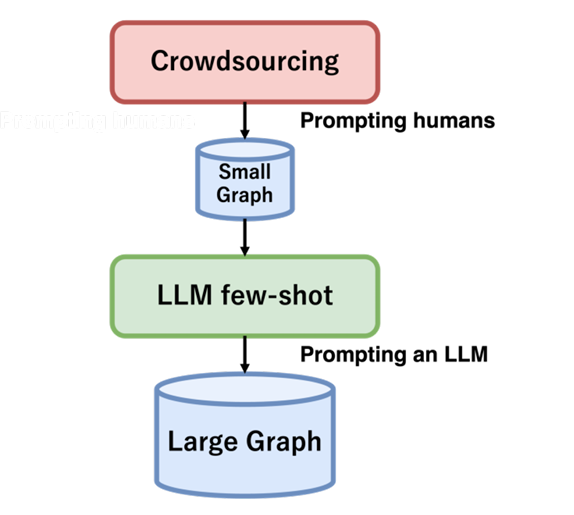

PHALM👆

In [ ]:
%%capture
!pip install tavily-python langchain-groq
!pip install langchain langchain-google-genai langchain-core langchain-experimental langchain-community

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model = 'gemini-2.0-flash',
    temperature = 0,
    google_api_key = 'YOUR_KEY_HERE'
)

In [ ]:
response = llm.invoke("hi")
response.content

'Hi there! How can I help you today?'

In [ ]:
import pandas as pd

In [ ]:
from tavily import TavilyClient
tavily_client = TavilyClient(api_key="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")


## **📝 Note on Data Collection and API Usage**

To manage API rate limits and maintain uninterrupted access during the data extraction process, we divided the input list (names) into 8 separate subsets. The extraction loop was executed manually for each subset, where we:

Provided a custom start_id for tracking progress across batches.

Swapped out the Tavily and Gemini API keys for each run to stay within the free usage limits.

> ⚙️ While this method works for experimentation and prototyping, it introduces manual overhead and limits scalability.

**Recommended Enhancements for Production Use:**

For a robust and scalable setup, we recommend:

- Using GPT-4o or LLaMA 4 models with adequate credits to ensure better consistency, factual accuracy, and reasoning ability.

- Upgrading to Tavily Pro or adopting other reliable web search APIs that support higher throughput and guaranteed uptime.

Automating the batching and API key management using a key rotation strategy or an API gateway with rate limit handling.

> These improvements would significantly reduce manual intervention and enhance the pipeline’s ability to handle large datasets in production-grade environments.



In [ ]:
scientists = [
    "Jean Louis Rodolphe Agassiz",
    "Maria Gaetana Agnesi",
    "Abu Ali ibn al-Haytham",
    "Jim Al-Khalili",
    "Muhammad ibn Musa al-Khwarizmi",
    "Luis Walter Alvarez",
    "Andre Marie Ampère",
    "Carl David Anderson",
    "Mary Anning",
    "Virginia Apgar",
    "Agnes Mary Arber",
    "Svante August Arrhenius",
    "Oswald Theodore Avery",
    "Amedeo Carlo Avogadro",
    "Charles Babbage",
    "Francis Bacon",
    "Joseph Banks",
    "John Bardeen",
    "Charles Glover Barkla",
    "William Maddock Bayliss",
    "George Wells Beadle",
    "Arnold Orville Beckman",
    "Antoine Henri Becquerel",
    "Emil Adolf von Behring",
    "Claude Bernard",
    "Timothy John Berners-Lee",
    "Daniel Bernoulli",
    "Jöns Jacob Berzelius",
    "Hans Albrecht Bethe",
    "Homi Jehangir Bhabha",
    "Alfred Binet",
    "Kristian Olaf Bernhard Birkeland",
    "James Whyte Black",
    "Elizabeth Blackwell",
    "Alfred Blalock",
    "Katharine Burr Blodgett",
    "Franz Boas",
    "David Joseph Bohm",
    "Aage Niels Bohr",
    "Niels Henrik David Bohr",
    "Ludwig Eduard Boltzmann",
    "Max Born",
    "Carl Bosch",
    "Jagadish Chandra Bose",
    "Satyendra Nath Bose",
    "Walther Wilhelm Georg Bothe",
    "Robert Boyle",
    "William Lawrence Bragg",
    "Tycho Brahe",
    "Hennig Brand",
    "Georg Brandt",
    "Joseph Harlen Bretz",
    "Louis Victor Pierre Raymond de Broglie",
    "Alexandre Brongniart",
    "Michael E. Brown",
    "Robert Brown",
    "Eduard Buchner",
    "Linda Brown Buck",
    "William Buckland"]

scientists_2 = [
    "Georges-Louis Leclerc, Comte de Buffon",
    "Robert Wilhelm Bunsen",
    "Luther Burbank",
    "Susan Jocelyn Bell Burnell",
    "Frank Macfarlane Burnet",
    "Santiago Ramón y Cajal",
    "Melvin Ellis Calvin",
    "Rachel Louise Carson",
    "George Washington Carver",
    "Henry Cavendish",
    "Anders Celsius",
    "James Chadwick",
    "Subrahmanyan Chandrasekhar",
    "Emmanuelle Charpentier",
    "Erwin Chargaff",
    "Avram Noam Chomsky",
    "Steven Chu",
    "Leland Charles Clark",
    "John Douglas Cockcroft",
    "Arthur Holly Compton",
    "Nicolaus Copernicus",
    "Gerty Theresa Cori",
    "Charles-Augustin de Coulomb",
    "Brian Edward Cox",
    "Francis Harry Compton Crick",
    "James Croll",
    "Marie Skłodowska Curie",
    "Pierre Curie",
    "Georges Cuvier",
    "John Dalton",
    "James Dwight Dana",
    "Charles Robert Darwin",
    "Humphry Davy",
    "Peter Joseph Wilhelm Debye",
    "Christian de Duve",
    "Max Delbrück",
    "René Descartes",
    "Paul Adrien Maurice Dirac",
    "Theodosius Grygorovych Dobzhansky",
    "Jennifer Anne Doudna",
    "Frank Donald Drake",
    "John Carew Eccles",
    "Arthur Stanley Eddington",
    "Paul Ehrlich",
    "Albert Einstein",
    "Gertrude Belle Elion",
    "Leonhard Euler",
    "Michael Faraday"]

scientists_3 = [
    "Pierre de Fermat",
    "Enrico Fermi",
    "Richard Phillips Feynman",
    "Leonardo Bonacci",
    "Hermann Emil Fischer",
    "Ronald Aylmer Fisher",
    "Alexander Fleming",
    "John Ambrose Fleming",
    "Howard Walter Florey",
    "Dian Fossey",
    "Jean Bernard Léon Foucault",
    "Benjamin Franklin",
    "Rosalind Elsie Franklin",
    "Sigmund Freud",
    "Elizebeth Smith Friedman",
    "Galileo Galilei",
    "Francis Galton",
    "Luigi Galvani",
    "George Gamow",
    "Johann Carl Friedrich Gauss",
    "Murray Gell-Mann",
    "Marie-Sophie Germain",
    "Josiah Willard Gibbs",
    "William Gilbert",
    "Sheldon Lee Glashow",
    "Robert Hutchings Goddard",
    "Maria Goeppert-Mayer",
    "Thomas Gold",
    "Jane Goodall",
    "Stephen Jay Gould",
    "Otto von Guericke",
    "Fritz Haber",
    "Ernst Heinrich Haeckel",
    "Otto Hahn",
    "Albrecht von Haller",
    "Edmund Halley",
    "William Harvey",
    "Stephen William Hawking",
    "Werner Karl Heisenberg",
    "Hermann Ludwig Ferdinand von Helmholtz",
    "Jan Baptist van Helmont",
    "Joseph Henry",
    "Caroline Lucretia Herschel",
    "John Frederick William Herschel",
    "William Herschel"]

scientists_4 = [
    "Gustav Ludwig Hertz",
    "Heinrich Rudolf Hertz",
    "George de Hevesy",
    "Antony Hewish",
    "David Hilbert",
    "Maurice Ralph Hilleman",
    "Dorothy Mary Crowfoot Hodgkin",
    "Robert Hooke",
    "Frederick Gowland Hopkins",
    "Grace Brewster Murray Hopper",
    "Bernardo Alberto Houssay",
    "Frederick Hoyle",
    "Edwin Powell Hubble",
    "Alexander von Humboldt",
    "James Hutton",
    "Christiaan Huygens",
    "Jan Ingenhousz",
    "Ernst Ising",
    "Mae Carol Jemison",
    "Edward Jenner",
    "Jens Hans Daniel Jensen",
    "Irène Joliot-Curie",
    "James Prescott Joule",
    "Percy Lavon Julian",
    "Michio Kaku",
    "Heike Kamerlingh Onnes",
    "Pyotr Leonidovich Kapitsa",
    "Friedrich August Kekulé",
    "Frances Alice Kelsey",
    "Johannes Kepler",
    "Abdul Qadeer Khan",
    "Omar Khayyam",
    "Gustav Robert Kirchhoff",
    "Martin Johann Klaproth",
    "Donald Ervin Knuth",
    "Robert Koch",
    "Arthur Kornberg",
    "Emil Wilhelm Magnus Georg Kraepelin",
    "Hans Adolf Krebs",
    "Thomas Samuel Kuhn",
    "Stephanie Louise Kwolek",
    "Joseph-Louis Lagrange",
    "Jean-Baptiste Lamarck",
    "Lev Davidovich Landau"]

scientists_5 = [
    "Edwin Herbert Land",
    "Karl Landsteiner",
    "Pierre-Simon Laplace",
    "Max Theodor Felix von Laue",
    "Antoine-Laurent de Lavoisier",
    "Ernest Orlando Lawrence",
    "Henrietta Swan Leavitt",
    "Antonie Philips van Leeuwenhoek",
    "Inge Lehmann",
    "Gottfried Wilhelm Leibniz",
    "Georges Lemaître",
    "Leonardo da Vinci",
    "Aldo Leopold",
    "Rita Levi-Montalcini",
    "Claude Lévi-Strauss",
    "Gilbert Newton Lewis",
    "Willard Frank Libby",
    "Justus von Liebig",
    "Carl Linnaeus",
    "Joseph Lister",
    "Hendrik Antoon Lorentz",
    "Konrad Zacharias Lorenz",
    "Augusta Ada Lovelace",
    "Percival Lowell",
    "Charles Lyell",
    "Ernst Waldfried Josef Wenzel Mach"]

scientists_8=[
    "Marcello Malpighi",
    "Guglielmo Marconi",
    "Lynn Margulis",
    "Barry James Marshall",
    "James Clerk Maxwell",
    "Ernst Walter Mayr",
    "Barbara McClintock",
    "Lise Meitner",
    "Johann Gregor Mendel",
    "Dmitri Ivanovich Mendeleev",
    "Albert Abraham Michelson",
    "Milutin Milanković",
    "Maria Mitchell",
    "Mario José Molina",
    "Thomas Hunt Morgan",
    "Henry Gwyn Jeffreys Moseley",
    "John Napier",
    "Giulio Natta",
    "John von Neumann",
    "Isaac Newton",
    "Charles Nicolle",
    "Florence Nightingale",
    "Alfred Bernhard Nobel",
    "Emmy Amalie Noether",
    "Christiane Nüsslein-Volhard",
    "Severo Ochoa",
    "Hans Christian Ørsted",
    "Georg Simon Ohm",
    "Julius Robert Oppenheimer",
    "Wilhelm Ostwald",
    "George Emil Palade"]

scientists_6 = [
    "Blaise Pascal",
    "Louis Pasteur",
    "Wolfgang Ernst Pauli",
    "Linus Carl Pauling",
    "Ivan Petrovich Pavlov",
    "Cecilia Helena Payne-Gaposchkin",
    "Marguerite Catherine Perey",
    "William Henry Perkin",
    "Max Ferdinand Perutz",
    "Jean William Fritz Piaget",
    "Max Karl Ernst Ludwig Planck",
    "Jules Henri Poincaré",
    "John Anthony Pople",
    "George Porter",
    "Joseph Priestley",
    "Chandrasekhara Venkata Raman",
    "Srinivasa Ramanujan",
    "William Ramsay",
    "John Ray",
    "Francesco Redi",
    "Sally Kristen Ride",
    "Georg Friedrich Bernhard Riemann",
    "Wilhelm Conrad Röntgen",
    "Ronald Ross",
    "Vera Florence Cooper Rubin",
    "Ernest Rutherford",
    "Carl Edward Sagan",
    "Mohammad Abdus Salam",
    "Jonas Edward Salk",
    "Frederick Sanger",
    "Erwin Rudolf Josef Alexander Schrödinger",
    "Theodor Schwann",
    "Julian Seymour Schwinger",
    "Glenn Theodore Seaborg",
    "Charles Scott Sherrington",
    "Burrhus Frederic Skinner",
    "William Smith",
    "Frederick Soddy",
    "Mary Fairfax Somerville",
    "Arnold Johannes Wilhelm Sommerfeld",
    "Niels Henrik Abel Steno",
    "Nettie Maria Stevens",
    "Leo Szilard",
    "Edward Teller",
    "Joseph John Thomson",
    "William Thomson",
    "Kip Stephen Thorne",
    "Sin-Itiro Tomonaga",
    "Clyde William Tombaugh",
    "Susumu Tonegawa",
    "Evangelista Torricelli",
    "Charles Hard Townes",
    "Youyou Tu"]

scientist_7 = [
    "Alan Mathison Turing",
    "Neil deGrasse Tyson",
    "Harold Clayton Urey",
    "John Craig Venter",
    "Andreas Vesalius",
    "Rudolf Ludwig Carl Virchow",
    "Alessandro Giuseppe Antonio Anastasio Volta",
    "Selman Abraham Waksman",
    "George Wald",
    "Alfred Russel Wallace",
    "John Wallis",
    "Ernest Thomas Sinton Walton",
    "James Dewey Watson",
    "James Watt",
    "Alfred Lothar Wegener",
    "Steven Weinberg",
    "John Archibald Wheeler",
    "Maurice Hugh Frederick Wilkins",
    "Edward Osborne Wilson",
    "Sergei Nikolaevich Winogradsky",
    "Carl Richard Woese",
    "Friedrich Wöhler",
    "Robert Burns Woodward",
    "Wilhelm Max Wundt",
    "Shinya Yamanaka",
    "Chen-Ning Franklin Yang",
    "Hideki Yukawa",
    "Karl Ziegler",
    "Alexander Graham Bell",
    "Nikola Tesla",
    "Anne L'Huillier",
    "Pierre Agostini",
    "Moungi Gabriel Bawendi",
    "Louis Eugene Brus"
]

In [ ]:
# === INITIALIZE EMPTY DATAFRAMES ===
scientists_df = pd.DataFrame(columns=['id', 'name', 'dob', 'spouse', 'children', 'description'])
countries_df = pd.DataFrame(columns=['id', 'name', 'capital', 'famous_scientists', 'description'])
collaborations_df = pd.DataFrame(columns=['id', 'scientists'])
theories_df = pd.DataFrame(columns=['id', 'description', 'collaborated_scientists'])
institutes_studied_df = pd.DataFrame(columns=['id', 'name'])
institutes_worked_df = pd.DataFrame(columns=['id', 'name'])
awards_df = pd.DataFrame(columns=['id', 'scientist_id', 'award_dict'])

##**📝 Note on DataFrame Fields**

During preprocessing, several inconsistencies were identified across the generated DataFrames:

- The `famous_scientists` column in `countries_df` frequently contains `NaN` values, indicating incomplete entity linking or extraction failures.

- The `scientist_id` column in `awards_df` was found to be a redundant repetition of the `id` column and has therefore been removed in Part 2 of the notebook.

The description field in countries_df often includes biographical details of scientists instead of actual descriptions of the countries themselves. This misalignment is likely due to limitations in the LLM's contextual focus during prompt execution.

> ⚠️ These issues, while minor, can impact graph accuracy if left unaddressed.

## **✅ Suggested Solution**

To improve data quality and ensure more reliable extraction:

- Implement a LangGraph ReAct Agent using the create_react_agent method:
  https://python.langchain.com/api_reference/langchain/agents/langchain.agents.react.agent.create_react_agent.html

- This agent can leverage iterative reasoning and tool calling, allowing:

- Step-by-step refinement of outputs.

    - Re-querying of incomplete or low-confidence fields.

    - Dynamic decision-making based on prior context.

> By using a stronger LLM (such as GPT-4o or Claude Opus or Llama 4) in conjunction with a LangGraph-based ReAct agent, these inconsistencies can be systematically resolved through unlimited API call chaining, improving both precision and coverage across all DataFrames.

In [ ]:
from langchain.output_parsers import StructuredOutputParser, ResponseSchema
from langchain.prompts import ChatPromptTemplate
import pandas as pd
import json
import time

In [ ]:
# === DEFINE SCHEMA AND PARSER ===
response_schemas = [
    ResponseSchema(name="name", description="Full name"),
    ResponseSchema(name="dob", description="Date of birth 'dd/mm/yy' if no info available say NA"),
    ResponseSchema(name="spouse", description="Spouse's name(s), as a list, if no info available say NA"),
    ResponseSchema(name="children", description="Children's names, as a list, if no info available say NA"),
    ResponseSchema(name="description", description="Description of life and work"),
    ResponseSchema(name="country", description="Country where the scientist was born"),
    ResponseSchema(name="famous_scientists", description="List of other famous scientists from the country, if no info available say NA"),
    ResponseSchema(name="capital", description="Capital of the country"),
    ResponseSchema(name="theories", description="List of theories with names and descriptions"),
    ResponseSchema(name="collaborations", description="List of names of collaborators"),
    ResponseSchema(name="institutes_studied", description="Dictionary of institute the scientist studied in the format {'name_of the institute':'country_it_belongs_to'}, if no info available say NA"),
    ResponseSchema(name="institutes_worked", description="Dictionary of institute worked at,in the format {'name_of the institute':'country_it_belongs_to'}, if no info available say NA"),
    ResponseSchema(name="awards", description="Dict of award name to year {award:year} ,if no info available for year don't consider the award"),
]
parser = StructuredOutputParser.from_response_schemas(response_schemas)

prompt = ChatPromptTemplate.from_messages([
    ("system", "Extract this data. Output ONLY valid JSON: {format_instructions}"),
    ("human", "{summary}")
])

> ⚠️ The variables start and scientist_x (where x denotes the list index from the 8 data subsets) were manually updated during each iteration of the extraction loop. This was necessary to bypass API rate limits, as discussed in the earlier section on API usage.

In [ ]:
for i, x in enumerate(scientist_7,start=305):
    try:
        print(f"\n🔍 Processing {x} (ID: {i})")

        queries = {
            "life": tavily_client.search(query=f"{x}'s life and work summary"),
            "family": tavily_client.search(query=f"{x}'s spouse and children"),
            "country": tavily_client.search(query=f"Which country was {x} born in? Give capital as well."),
            "country_desc": tavily_client.search(query=f"Describe the country where {x} was born, including other famous scientists."),
            "collaborators": tavily_client.search(query=f"Scientists {x} collaborated with"),
            "theories": tavily_client.search(query=f"List {x}'s major theories, collaborators involved in each"),
            "inst_studied": tavily_client.search(query=f"Institutions where {x} studied, also the names of top alumni"),
            "inst_worked": tavily_client.search(query=f"Institutions where {x} worked, also the names of top alumni/workmates"),
            "awards": tavily_client.search(query=f"Major awards won by {x}, with years"),
        }

        summary = ""
        for q_k, q_v in queries.items():
            if 'results' in q_v:
                for result in q_v['results']:
                    summary += result.get('content', '') + " "
        summary = summary.strip()

        formatted_prompt = prompt.format_messages(
            summary=summary,
            format_instructions=parser.get_format_instructions()
        )

        response = llm(formatted_prompt)
        parsed_data = parser.parse(response.content)

        # Populate DataFrames
        scientists_df.loc[len(scientists_df)] = {
            'id': i,
            'name': parsed_data.get('name', 'NA'),
            'dob': parsed_data.get('dob', 'NA'),
            'spouse': parsed_data.get('spouse', 'NA'),
            'children': parsed_data.get('children', 'NA'),
            'description': parsed_data.get('description', 'NA')
        }

        countries_df.loc[len(countries_df)] = {
            'id': i,
            'name': parsed_data.get('country', 'NA'),
            'capital': parsed_data.get('capital', 'NA'),
            'famous_scientists': parsed_data.get('famous_scientists', 'NA'),
            'description': queries['country_desc']['results'][0].get('content', '') if 'results' in queries['country_desc'] else 'NA'
        }

        collaborators = parsed_data.get('collaborations', [])
        if collaborators and isinstance(collaborators, list):
            for colab in collaborators:
                collaborations_df.loc[len(collaborations_df)] = {
                    'id': i,
                    'scientists': colab.strip()
                }

        theories = parsed_data.get('theories', [])
        if theories and isinstance(theories, list):
            for theory_obj in theories:
                if isinstance(theory_obj, dict):
                    theories_df.loc[len(theories_df)] = {
                        'id': i,
                        'description': theory_obj.get('name', 'NA') + ": " + theory_obj.get('description', 'NA'),
                        'collaborated_scientists': ", ".join(theory_obj.get('collaborators', [])) if 'collaborators' in theory_obj else 'NA'
                    }

        inst_studied = parsed_data.get('institutes_studied', {})
        if isinstance(inst_studied, dict):
            for inst, country in inst_studied.items():
                institutes_studied_df.loc[len(institutes_studied_df)] = {
                    'id': i,
                    'name': f"{inst} ({country})"
                }

        inst_worked = parsed_data.get('institutes_worked', {})
        if isinstance(inst_worked, dict):
            for inst, country in inst_worked.items():
                institutes_worked_df.loc[len(institutes_worked_df)] = {
                    'id': i,
                    'name': f"{inst} ({country})"
                }

        awards = parsed_data.get('awards', {})
        if isinstance(awards, dict):
            for award, year in awards.items():
                if not year or str(year).lower() == 'nan':
                    continue
                awards_df.loc[len(awards_df)] = {
                    'id': i,
                    'scientist_id': i,
                    'award_dict': json.dumps({award.strip(): year})
                }

    except Exception as e:
        print(f"[❌] Failed to process {x}: {e}")
        continue

    time.sleep(10)


🔍 Processing Alan Mathison Turing (ID: 305)

🔍 Processing Neil deGrasse Tyson (ID: 306)

🔍 Processing Harold Clayton Urey (ID: 307)

🔍 Processing John Craig Venter (ID: 308)

🔍 Processing Andreas Vesalius (ID: 309)

🔍 Processing Rudolf Ludwig Carl Virchow (ID: 310)

🔍 Processing Alessandro Giuseppe Antonio Anastasio Volta (ID: 311)

🔍 Processing Selman Abraham Waksman (ID: 312)

🔍 Processing George Wald (ID: 313)

🔍 Processing Alfred Russel Wallace (ID: 314)

🔍 Processing John Wallis (ID: 315)

🔍 Processing Ernest Thomas Sinton Walton (ID: 316)

🔍 Processing James Dewey Watson (ID: 317)

🔍 Processing James Watt (ID: 318)

🔍 Processing Alfred Lothar Wegener (ID: 319)

🔍 Processing Steven Weinberg (ID: 320)

🔍 Processing John Archibald Wheeler (ID: 321)

🔍 Processing Maurice Hugh Frederick Wilkins (ID: 322)

🔍 Processing Edward Osborne Wilson (ID: 323)

🔍 Processing Sergei Nikolaevich Winogradsky (ID: 324)

🔍 Processing Carl Richard Woese (ID: 325)

🔍 Processing Friedrich Wöhler (ID: 32

In [ ]:
print("Scientists_df:", len(scientists_df))
print("Countries_df:", len(countries_df))
print("Collaborations_df:", len(collaborations_df))
print("Theories_df:", len(theories_df))
print("Institutes_studied_df:", len(institutes_studied_df))
print("Institutes_worked_df:", len(institutes_worked_df))
print("Awards_df:", len(awards_df))

Scientists_df: 338
Countries_df: 338
Collaborations_df: 906
Theories_df: 589
Institutes_studied_df: 699
Institutes_worked_df: 813
Awards_df: 616


In [ ]:
scientists_df.to_csv('scientists.csv', index=False)
awards_df.to_csv('awards.csv', index=False)
countries_df.to_csv('countries.csv', index=False)
collaborations_df.to_csv('collaborations.csv', index=False)
theories_df.to_csv('theories.csv', index=False)
institutes_studied_df.to_csv('institutes_studied.csv', index=False)
institutes_worked_df.to_csv('institutes_worked.csv', index=False)